In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
#Import data
data = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")

In [6]:
data.shape

(10000, 14)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
data[data['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [17]:
# Count of duplicate rows
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [18]:
data_cleaned=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [19]:
data_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
data_cleaned['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
data_cleaned['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

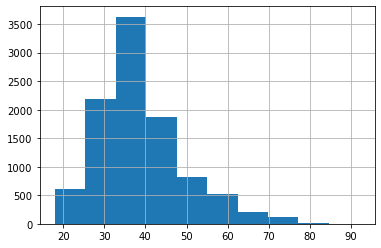

In [22]:
data_cleaned['Age'].hist()

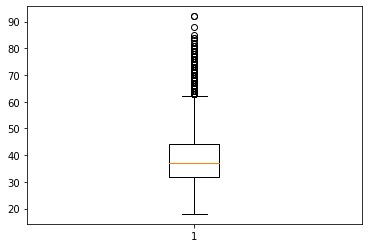

In [23]:
# box plot
data_box = data_cleaned.dropna()
data1_box = data_box.Age
box=plt.boxplot(data1_box)

In [24]:
data1_box

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [25]:
box['fliers']

In [26]:
for i in box['fliers']:
    print(i.get_ydata())

[66 75 65 73 65 72 67 67 79 80 68 75 66 66 70 63 72 64 64 70 67 82 63 69
 65 69 64 65 74 67 66 67 63 70 71 72 67 74 76 66 63 66 68 67 63 71 66 69
 73 65 66 64 69 64 77 74 65 70 67 69 67 74 69 74 74 64 63 63 70 74 65 72
 77 66 65 74 88 63 71 63 64 67 70 68 72 71 66 75 67 73 69 76 63 85 67 74
 76 66 69 66 72 63 71 63 74 67 72 72 66 84 71 66 63 74 69 84 67 64 68 66
 77 70 67 79 67 76 73 66 67 64 73 76 72 64 71 63 70 65 66 65 80 66 63 63
 63 63 66 74 69 63 64 76 75 68 69 77 64 66 74 71 67 68 64 68 70 64 75 66
 64 78 65 74 64 64 71 77 79 70 81 64 68 68 63 79 66 64 70 69 71 72 66 68
 63 71 72 72 64 78 75 65 65 67 63 68 71 73 64 66 71 69 71 66 76 69 73 64
 64 75 73 71 72 63 67 68 73 67 64 63 92 65 75 67 71 64 66 64 66 67 77 92
 67 63 66 66 68 65 72 71 76 63 67 67 66 67 63 65 70 72 77 74 72 73 77 67
 71 64 72 81 76 69 68 74 64 64 71 68 63 67 63 64 76 63 63 68 67 72 70 81
 67 73 66 68 71 66 63 75 69 64 69 70 71 71 66 70 63 64 65 63 67 71 67 65
 66 63 73 66 64 72 71 69 67 64 81 73 63 67 74 83 69

In [27]:
[item.get_ydata() for item in box['fliers']]

[array([66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72,
        64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70,
        71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66,
        64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63,
        70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72,
        71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63,
        71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68,
        66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63,
        70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75,
        68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78,
        65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70,
        69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68,
        71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72,
        63, 

{'whiskers': [<matplotlib.lines.Line2D at 0x196ab513eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x196ab524490>,
 'boxes': [<matplotlib.lines.Line2D at 0x196ab513be0>],
 'medians': [<matplotlib.lines.Line2D at 0x196ab524a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x196ab524d00>],
 'means': []}

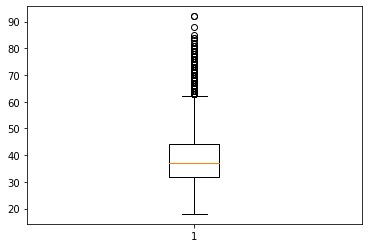

In [28]:
plt.boxplot(data_cleaned['Age'])

In [29]:
# to get the whiskers
[item.get_ydata()[1] for item in box['whiskers']]

[18.0, 62.0]

In [30]:
data_cleaned['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [31]:
data_cleaned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Transformations

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit_transform(data_cleaned[['Geography']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [33]:
ohe.inverse_transform([[1,0,0]])

array([['France']], dtype=object)

In [34]:
X=pd.get_dummies(data_cleaned.drop('Exited',axis=1))

In [35]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [36]:
Y = data_cleaned['Exited']

In [37]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [38]:
model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

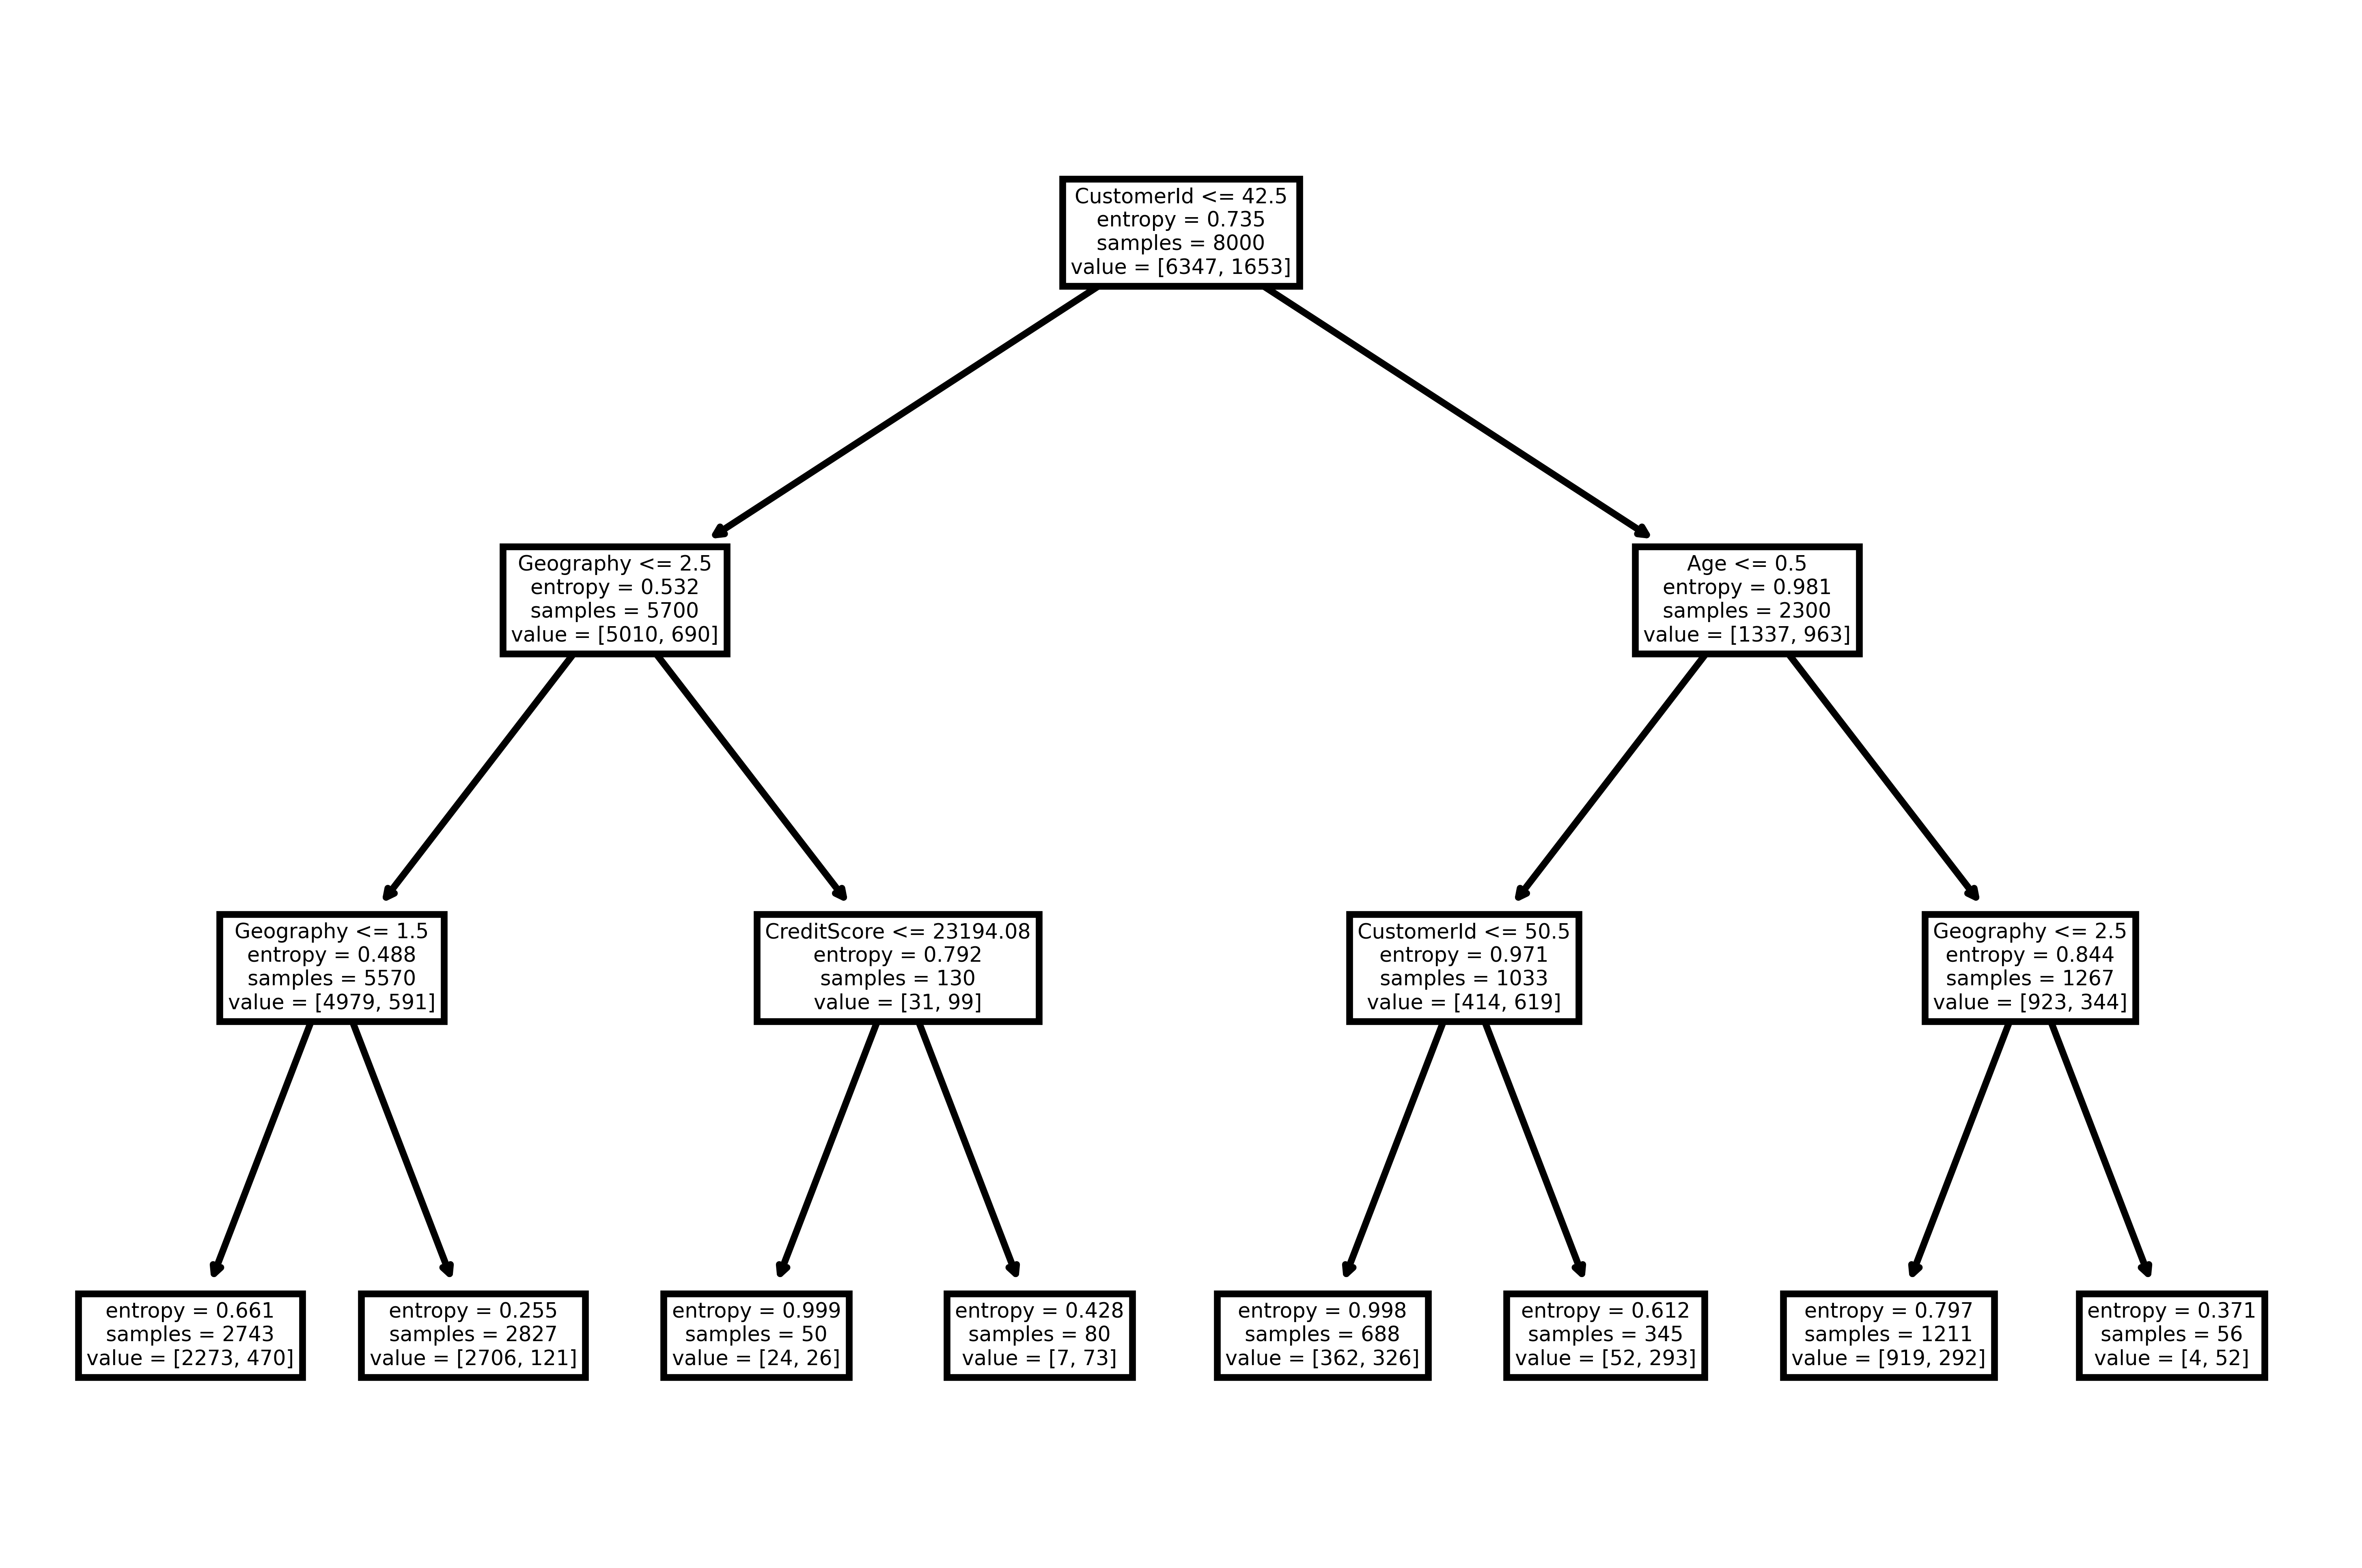

In [39]:
# Plot the Decision tree
cl=data.columns
plt.figure(dpi=1200)
plot_tree(model,feature_names=cl)
plt.show()

In [40]:
pred = model.predict(x_test)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1616
           1       0.81      0.26      0.40       384

    accuracy                           0.85      2000
   macro avg       0.83      0.62      0.66      2000
weighted avg       0.84      0.85      0.81      2000



## Making a Predictive System

In [50]:
Input_data=(619,42,2,0.00,1,1,1,101348.82,1,0)

In [51]:
# chainging the input_data to numpy array
Input_array = np.asarray(Input_data)

In [52]:
# Reshape the array
Input_reshape = Input_array.reshape(1,-1)

In [53]:
prediction = model.predict(Input_array)
print(prediction)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[6.1900000e+02 4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0134882e+05 1.0000000e+00 0.0000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
if (prediction[0]==0):
    print("Employee will not exicted")
else:
    print("Employee will exicted")

NameError: name 'prediction' is not defined

In [44]:
import joblib 


In [45]:
#joblib.dump(model,'churn_detection.h5')